In [46]:
# Libraries/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [3]:
# Load and Read Data
df = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-W.WGrainger,inc/Desktop/data mining data/framingham.csv')
# Change `male` to `sex`
df = df.rename(columns={'male': 'sex'})
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.describe()

### variables
- `male`: the sex of the patient (1: male, 0: female)
- `age`: age of patient
- `education`: ??
- `currentSmoker`: (1: current smoker, 0: non-current smoker)
- `cigsPerDay`: nuber of cigarettes that person smoked on average in one day
- `BPMeds`: is patient on blood pressure medication (1: yes, 0: no)
- `prevalentStroke`: did patient previously have a stroke (1: yes, 0 no)
- `prevalentHyp`: is patient hypertensive (1: yes, 0: no)
- `diabetes`: does patient have diabetes (1: yes, 0: no)
- `totChol`: total cholesterol level
- `sysBP`: systolic blood pressure
- `diaBP`: diastolic blood pressure
- `BMI`: Body Mass Index
- `heartRate`: heart rate
- `glucose`: glucose level
##### Target Variable
- `TenYearCHD`: the 10 year risk of coronary heart disease CHD (1: yes, 0: no)

In [5]:
# checking for missing values
print(df.isnull().sum())

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [4]:
# imputing missing values

# mean/median/mode imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
df[['cigsPerDay']] = imputer.fit_transform(df[['cigsPerDay']])
df[['totChol']] = imputer.fit_transform(df[['totChol']])
df[['BMI']] = imputer.fit_transform(df[['BMI']])
df[['heartRate']] = imputer.fit_transform(df[['heartRate']])
df[['glucose']] = imputer.fit_transform(df[['glucose']])

imputer = SimpleImputer(strategy = 'most_frequent')
df[['education']] = imputer.fit_transform(df[['education']])
df[['BPMeds']] = imputer.fit_transform(df[['BPMeds']])

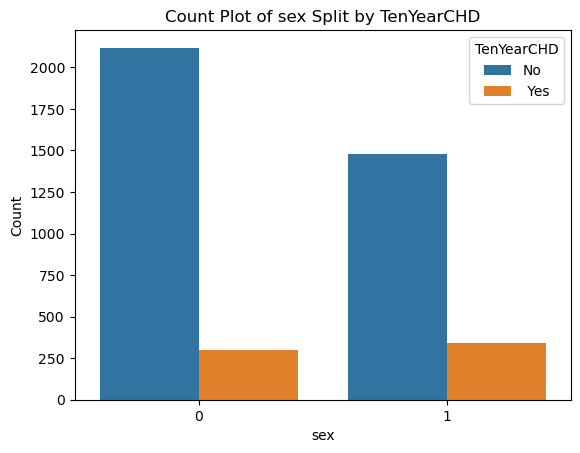

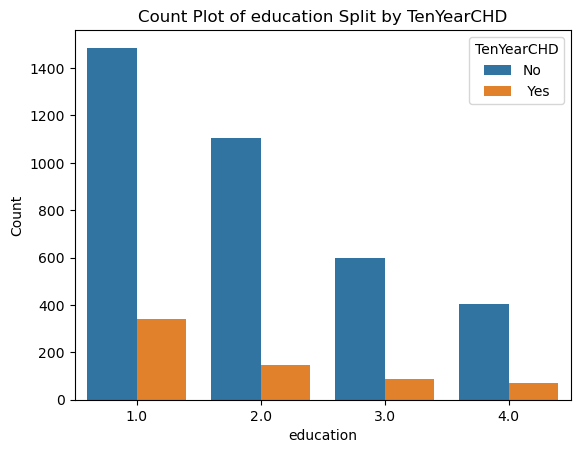

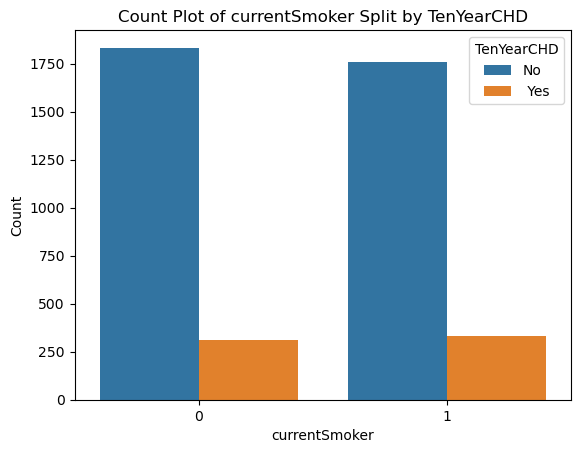

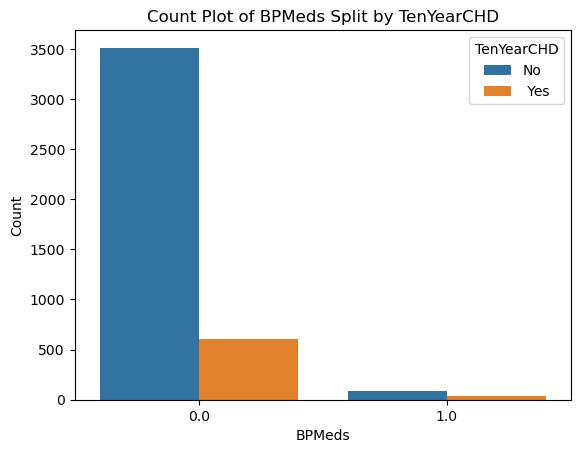

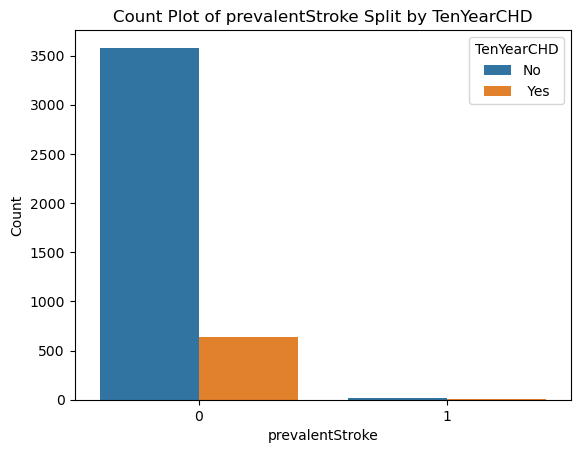

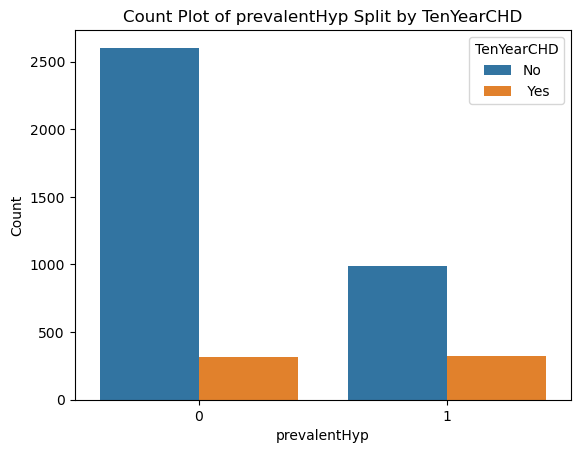

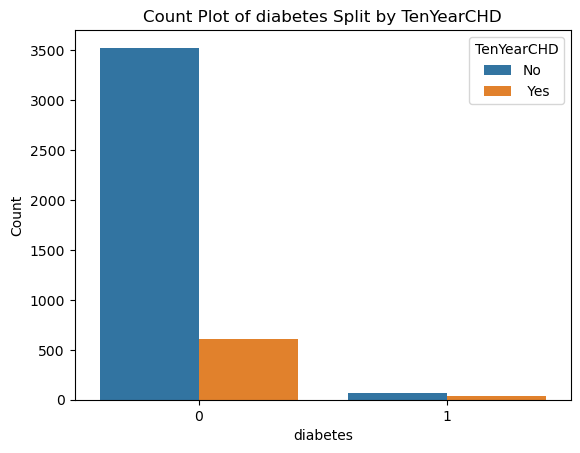

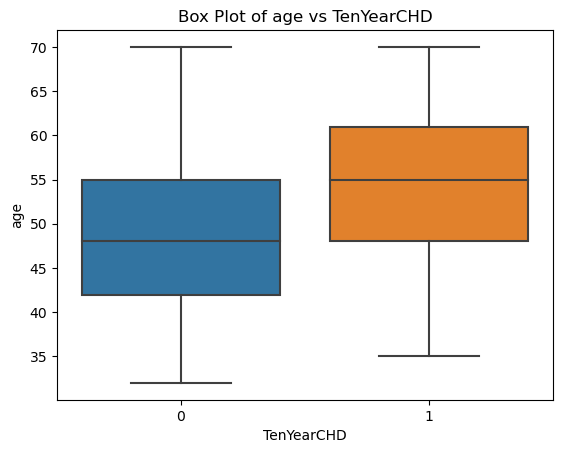

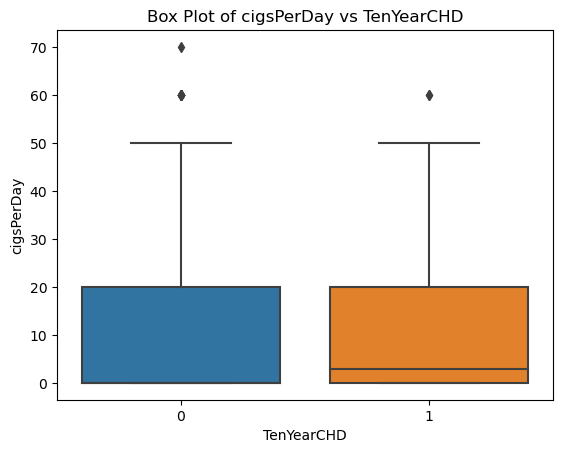

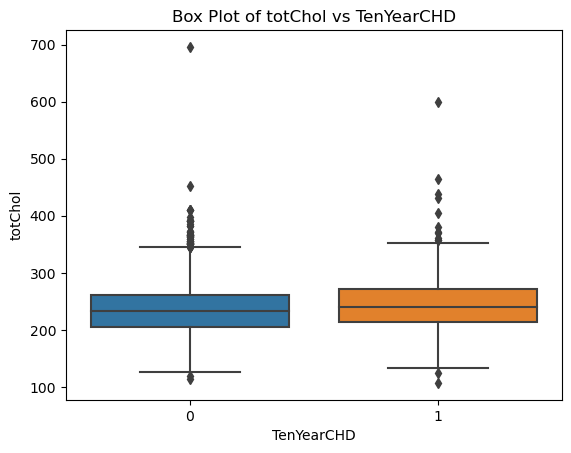

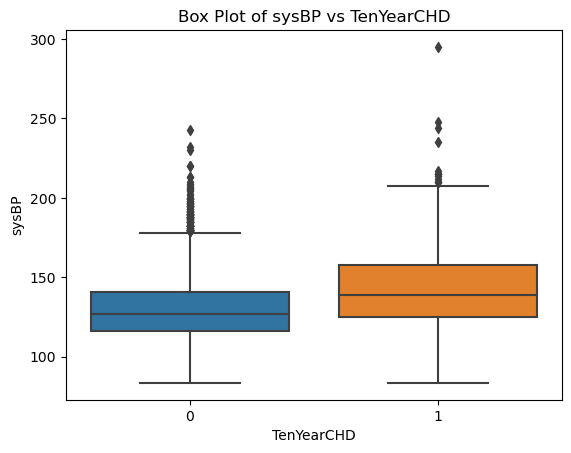

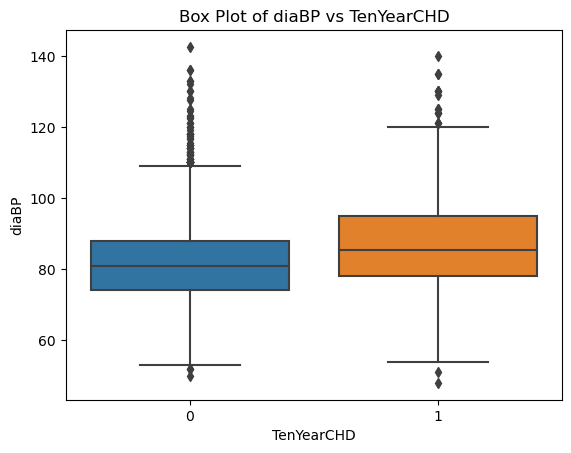

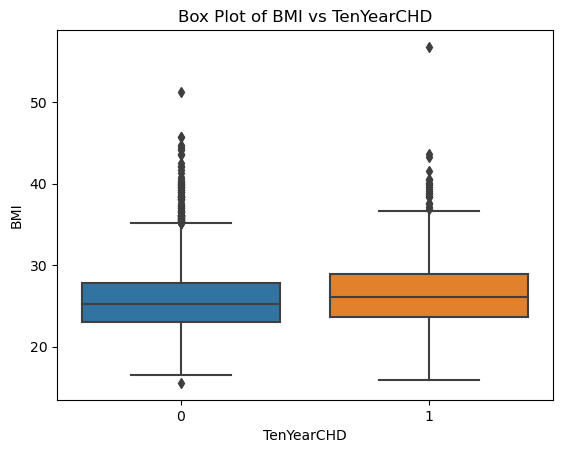

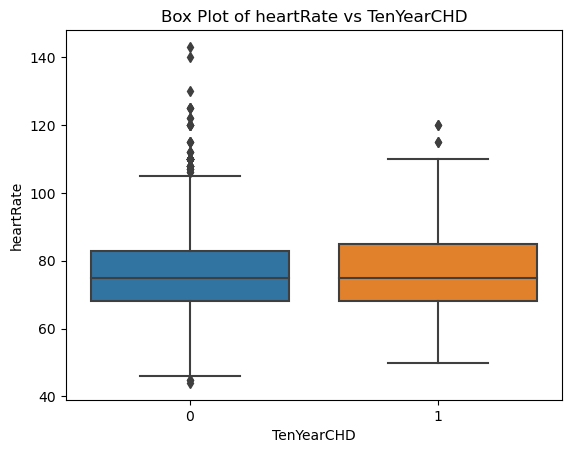

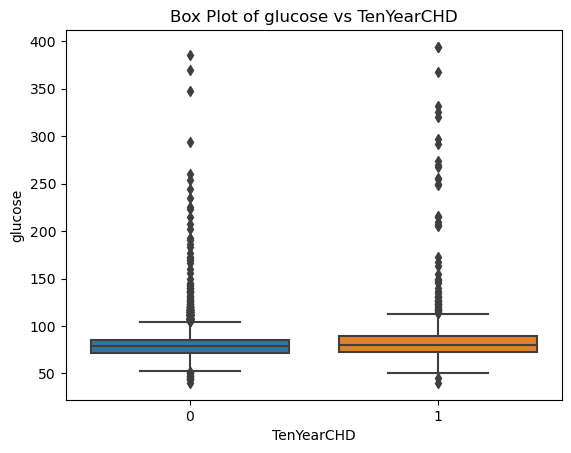

In [6]:
## eda for variables vs response
numeric_vars = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate',
                'glucose']
cat_vars = ['sex','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp',
            'diabetes']

for var in cat_vars:
    sns.countplot(data = df, x = var, hue = 'TenYearCHD')
    plt.title(f'Count Plot of {var} Split by TenYearCHD')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title = 'TenYearCHD', labels = ['No',' Yes'])
    plt.show()
    
for var in numeric_vars:
    sns.boxplot(data = df, x = 'TenYearCHD', y = var)
    plt.title(f'Box Plot of {var} vs TenYearCHD')
    plt.xlabel('TenYearCHD')
    plt.ylabel(var)
    plt.show()

In [ ]:
# feature selection
corr_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix')
plt.show()


In [10]:
predictors = df.drop(columns = ['TenYearCHD'])
resp = df['TenYearCHD']

In [11]:
vif_data = pd.DataFrame()
vif_data['feature'] = predictors.columns
vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

print(vif_data)

            feature         VIF
0               sex    2.089639
1               age   40.896944
2         education    4.574109
3     currentSmoker    4.854469
4        cigsPerDay    4.157649
5            BPMeds    1.131110
6   prevalentStroke    1.024883
7      prevalentHyp    2.385234
8          diabetes    1.566512
9           totChol   31.481657
10            sysBP  137.551031
11            diaBP  135.675491
12              BMI   45.063271
13        heartRate   38.756302
14          glucose   21.044533


In [20]:
# drop predictors that have high VIF one at a time
df_mod = df.drop(columns = ['diaBP', 'sysBP','BMI','heartRate','totChol','glucose'])
predictors2 = df_mod.drop(columns = ['TenYearCHD'])

vif_data2 = pd.DataFrame()
vif_data2['feature'] = predictors2.columns
vif_data2['VIF'] = [variance_inflation_factor(predictors2.values, i) for i in range(len(predictors2.columns))]

print(vif_data2)

           feature       VIF
0              sex  1.956814
1              age  5.690192
2        education  4.009452
3    currentSmoker  4.739876
4       cigsPerDay  4.120666
5           BPMeds  1.120301
6  prevalentStroke  1.023708
7     prevalentHyp  1.679485
8         diabetes  1.040638


In [21]:
# check correlation of each potential feature with our response variable
corr = df_mod.corr().round(2).sort_values(by='TenYearCHD', ascending=False)
corr['TenYearCHD']

TenYearCHD         1.00
age                0.23
prevalentHyp       0.18
diabetes           0.10
sex                0.09
BPMeds             0.09
cigsPerDay         0.06
prevalentStroke    0.06
currentSmoker      0.02
education         -0.05
Name: TenYearCHD, dtype: float64

In [22]:
# split training and test 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(predictors2, resp, test_size = 0.3, random_state = 123)

In [23]:
# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = LogisticRegression()
rfe = RFE(estimator=model)
rfe.fit(X_train, y_train)
selected_features = predictors2.columns[rfe.support_]
print('Our selected features are:')
for feature in selected_features:
    print(feature)

Our selected features are:
sex
age
cigsPerDay
prevalentHyp


In [27]:
X_tr_v2 = pd.DataFrame(X_train[:, rfe.support_], columns=selected_features)
X_te_v2 = pd.DataFrame(X_test[:, rfe.support_], columns=selected_features)

#### Model 2 - k nearest neighbors

In [28]:
np.random.seed(123)

accuracy_scores = []
recall_scores = []

for k in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr_v2, y_train)
    y_pred = knn.predict(X_tr_v2)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_scores.append(accuracy)
    recall = recall_score(y_train, y_pred)
    recall_scores.append(recall)

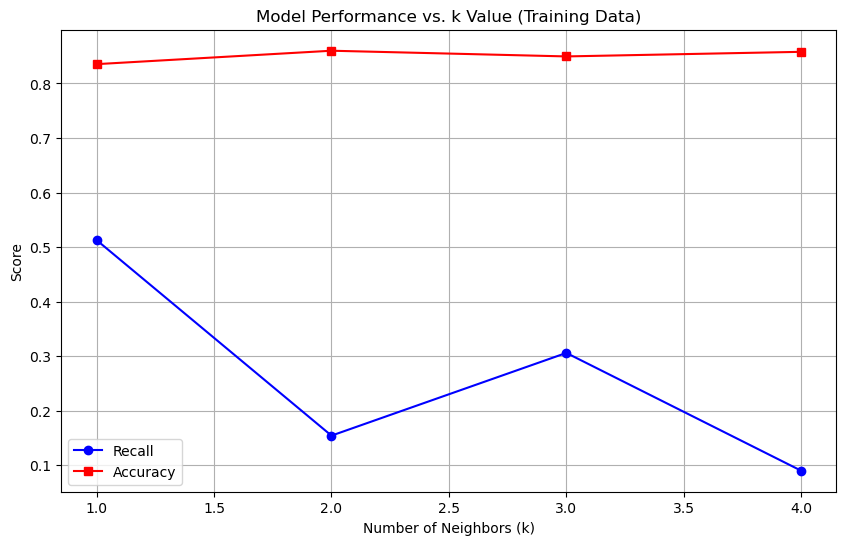

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), recall_scores, marker='o', linestyle='-', color='blue', label='Recall')
plt.plot(range(1, 5), accuracy_scores, marker='s', linestyle='-', color='red', label='Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Model Performance vs. k Value (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr_v2, y_train)
y_train_pred = knn.predict(X_tr_v2)
y__test_pred = knn.predict(X_te_v2)

## Logistic Regression

[[2524    7]
 [ 428    7]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2531
           1       0.50      0.02      0.03       435

    accuracy                           0.85      2966
   macro avg       0.68      0.51      0.48      2966
weighted avg       0.80      0.85      0.79      2966

The Test Classification table is [[1058    5]
 [ 202    7]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1063
           1       0.58      0.03      0.06       209

    accuracy                           0.84      1272
   macro avg       0.71      0.51      0.49      1272
weighted avg       0.80      0.84      0.77      1272



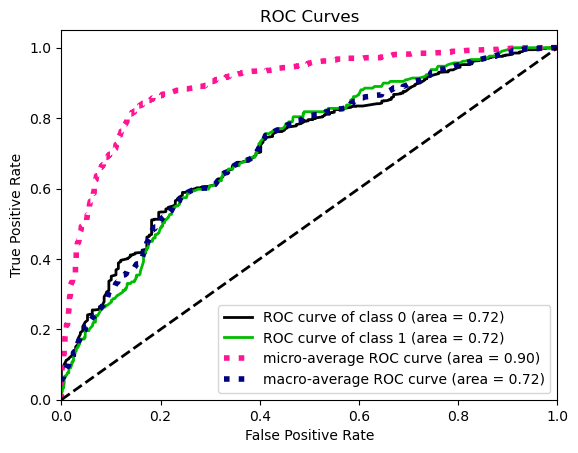

The AUC Value for the model is 0.7183177519613624


In [48]:
mymodel= LogisticRegression()

my_results_train = mymodel.fit(X_tr_v2,y_train)
predictions_train=my_results_train.predict(X_tr_v2)
print(confusion_matrix(y_train, predictions_train))

print(classification_report(y_train, predictions_train))

predictions_test=my_results_train.predict(X_te_v2)
predictions_test_prob=my_results_train.predict_proba(X_te_v2)

print("The Test Classification table is", confusion_matrix(y_test, predictions_test))
print(classification_report(y_test, predictions_test))

fpr, tpr, tholds = metrics.roc_curve(y_test, predictions_test_prob[:,1], pos_label = 1)
skplt.metrics.plot_roc(y_test, predictions_test_prob)
plt.show()

print("The AUC Value for the model is", metrics.auc(fpr, tpr))
# print("The thresholds tried are,", tholds

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.

Interpreting the results: Odds Ratio, Confidence Intervals and P-values
• This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.
• The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.
• Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.
• For Total cholesterol level and glucose level there is no significant change.

• There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

Model Evaluation - Statistics
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.
Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5
lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

Conclusions
• All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

• Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease

• Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Glucose too causes a very negligible change in odds (0.2%)

• The model predicted with 0.88 accuracy. The model is more specific than sensitive. Overall model could be improved with more data